In [2]:
import statsmodels.api

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import random as rm
import time as tm
import matplotlib.pyplot as plt
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import sklearn.metrics as skm
import sklearn.impute as ski
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import scipy.stats as stats
import statistics
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)

## Splitting the Data

In [4]:
df1 = pd.read_csv('CA.csv', index_col=0)
df1 = df1.drop(columns=['STATE'])
df1.index = pd.to_datetime(df1.index)
df1

,new_cases_10_min,income_support,contact_tracing,personal_income,Booster_Doses_12to18,new_cases_2_lag,restrictions_on_internal_movement,testing_policy,facial_coverings,debt_relief,...,new_cases_50_std,new_cases_100_std,new_cases_50_max,Booster_Doses_18to50,vaccination_policy,Series_Complete_12Pto18,vaccination_rate_1dose,maximum_temperature_celsius,Administered_Dose1_Recip_12to18,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-01,5.0,0.0,1.0,3592144,0.0,186.0,0.5,2.0,0.5,1.0,...,209.622086,1902.926701,1046.0,0.0,2.5,0.0,0.000000,26.848765,0.0,5
2020-03-02,5.0,0.0,1.0,3592144,0.0,135.0,0.5,2.0,0.5,1.0,...,205.861816,1735.166908,1046.0,0.0,2.5,0.0,0.000000,26.848765,0.0,5
2020-03-03,5.0,0.0,1.0,3592144,0.0,5.0,0.5,2.0,0.5,1.0,...,205.920111,1592.384164,1046.0,0.0,2.5,0.0,0.000000,26.848765,0.0,7
2020-03-04,5.0,0.0,1.0,3592144,0.0,5.0,0.0,1.0,0.0,1.0,...,206.456361,1569.958646,1046.0,0.0,0.0,0.0,0.000000,24.685185,0.0,10
2020-03-05,5.0,1.0,1.0,3592144,0.0,7.0,0.0,1.0,0.0,1.0,...,205.679438,1555.493114,1046.0,0.0,0.0,0.0,0.000000,25.753086,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,0.0,0.0,1.0,3888196,629347.0,0.0,1.0,3.0,2.0,1.0,...,4052.353343,42391.934228,17778.0,6067374.0,5.0,2183863.0,0.818862,28.561111,2470037.0,4531
2022-04-26,0.0,0.0,1.0,3888196,629879.0,0.0,1.0,3.0,2.0,1.0,...,4309.562938,42339.847317,17778.0,6069677.0,5.0,2184151.0,0.818984,28.277778,2470385.0,16180
2022-04-27,0.0,0.0,1.0,3888196,630612.0,4531.0,1.0,3.0,2.0,1.0,...,4319.108918,37351.458854,17778.0,6073916.0,5.0,2184521.0,0.819211,25.316667,2470905.0,1852


In [5]:
data = df1[['PEOPLE_POSITIVE_NEW_CASES_COUNT']]

In [6]:
train_data = data.iloc[:632]
test_data = data.iloc[632:]
test_data.rename(columns={'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'PEOPLE_POSITIVE_NEW_CASES_COUNT_test'}, inplace=True)

/var/folders/84/xq_0_7lj3xd98d9n_0cn_m7w0000gn/T/ipykernel_19216/2715357754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.rename(columns={'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'PEOPLE_POSITIVE_NEW_CASES_COUNT_test'}, inplace=True)


In [7]:
test_data \
    .rename(columns={'test_data': 'TEST SET'}) \
    .join(train_data.rename(columns={'train_data': 'TRAINING SET'}), how='outer')

,PEOPLE_POSITIVE_NEW_CASES_COUNT_test,PEOPLE_POSITIVE_NEW_CASES_COUNT
Date,,
2020-03-01,NaN,5.0
2020-03-02,NaN,5.0
2020-03-03,NaN,7.0
2020-03-04,NaN,10.0
2020-03-05,NaN,12.0
...,...,...
2022-04-25,4531.0,NaN
2022-04-26,16180.0,NaN
2022-04-27,1852.0,NaN


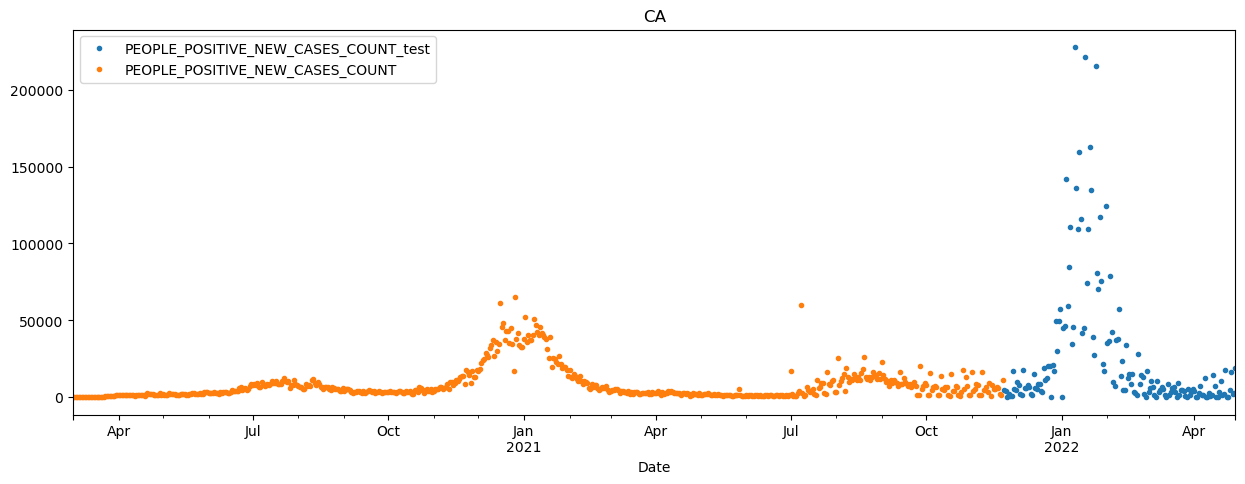

In [8]:
_ = test_data \
    .rename(columns={'test_data': 'TEST SET'}) \
    .join(train_data.rename(columns={'train_data': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='CA', style='.')

## Baseline ARIMA

### Base

In [9]:
model=ARIMA(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(1,1,1))
model_fit=model.fit()

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:     PEOPLE_POSITIVE_NEW_CASES_COUNT   No. Observations:                  632
Model:                              ARIMA(1, 1, 1)   Log Likelihood               -6190.452
Date:                             Wed, 13 Mar 2024   AIC                          12386.904
Time:                                     02:18:07   BIC                          12400.246
Sample:                                 03-01-2020   HQIC                         12392.086
                                      - 11-22-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1042      0.026     -3.977      0.000      -0.156      -0.053
ma.L1         -0.6952      0.021    -32.919      0.000      -0.737      -0.654
sigma2      2.012e+07   2.24e+05     89.716      0.000    1.97e+07    2.06e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             79317.62
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              34.85   Skew:                             4.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

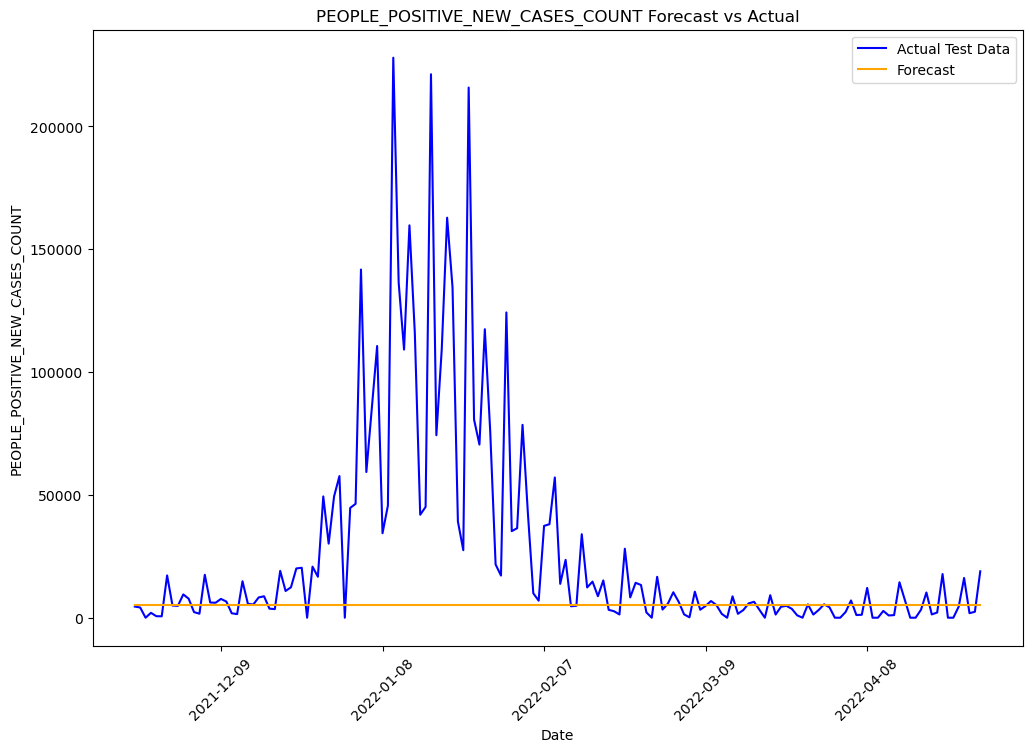

In [11]:
from matplotlib.ticker import MaxNLocator

forecast = model_fit.forecast(steps=len(test_data))[0]

forecast_series = pd.Series(forecast, index=test_data.index)

plt.figure(figsize=(12, 8))
plt.plot(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], label='Actual Test Data', color='blue')
plt.plot(forecast_series, label='Forecast', color='orange')

plt.title('PEOPLE_POSITIVE_NEW_CASES_COUNT Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(6)) 

plt.xticks(rotation=45)

plt.show()

In [12]:
forecast_series

Date
2021-11-23    5096.240551
2021-11-24    5096.240551
2021-11-25    5096.240551
2021-11-26    5096.240551
2021-11-27    5096.240551
                 ...     
2022-04-25    5096.240551
2022-04-26    5096.240551
2022-04-27    5096.240551
2022-04-28    5096.240551
2022-04-29    5096.240551
Length: 158, dtype: float64

In [14]:
model_rmse = mean_squared_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_series, squared=False)
model_mae = mean_absolute_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_series)
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

actuals = test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test']
naive_forecasts = actuals.shift(1)
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test RMSE:  49066.42554564961
Test MAE:  23862.30571113579
Test MASE: 1.2118397534931677


### Tuning

In [15]:
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)

p_range = range(1, 10)  
q_range = range(1, 10)  # Example range for q

best_aic, best_bic, best_cfg_aic, best_cfg_bic = float("inf"), float("inf"), None, None

for train_index, test_index in tscv.split(train_data):
    train = train_data.iloc[train_index]
    
    for p in p_range:
            for q in q_range:
                order = (p, 1, q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    bic = model_fit.bic
                    
                    # Track best AIC
                    if aic < best_aic:
                        best_aic, best_cfg_aic = aic, order
                    
                    # Track best BIC
                    if bic < best_bic:
                        best_bic, best_cfg_bic = bic, order
                    
                    print(f'ARIMA{order} AIC={aic:.3f}, BIC={bic:.3f}')
                except Exception as e:
                    continue

print(f'Best AIC: ARIMA{best_cfg_aic} AIC={best_aic:.3f}')
print(f'Best BIC: ARIMA{best_cfg_bic} BIC={best_bic:.3f}')

ARIMA(1, 1, 1) AIC=2556.553, BIC=2565.722
ARIMA(1, 1, 2) AIC=2557.828, BIC=2570.053
ARIMA(1, 1, 3) AIC=2549.624, BIC=2564.906
ARIMA(1, 1, 4) AIC=2547.858, BIC=2566.195
ARIMA(1, 1, 5) AIC=2548.755, BIC=2570.148
ARIMA(1, 1, 6) AIC=2544.087, BIC=2568.537
ARIMA(1, 1, 7) AIC=2536.661, BIC=2564.167
ARIMA(1, 1, 8) AIC=2536.670, BIC=2567.232
ARIMA(1, 1, 9) AIC=2543.980, BIC=2577.599
ARIMA(2, 1, 1) AIC=2557.828, BIC=2570.053
ARIMA(2, 1, 2) AIC=2542.458, BIC=2557.740
ARIMA(2, 1, 3) AIC=2549.071, BIC=2567.409
ARIMA(2, 1, 4) AIC=2551.980, BIC=2573.373
ARIMA(2, 1, 5) AIC=2542.956, BIC=2567.406
ARIMA(2, 1, 6) AIC=2538.690, BIC=2566.196
ARIMA(2, 1, 7) AIC=2537.345, BIC=2567.907
ARIMA(2, 1, 8) AIC=2541.247, BIC=2574.866
ARIMA(2, 1, 9) AIC=2540.167, BIC=2576.842
ARIMA(3, 1, 1) AIC=2559.702, BIC=2574.983
ARIMA(3, 1, 2) AIC=2561.664, BIC=2580.002
ARIMA(3, 1, 3) AIC=2550.873, BIC=2572.267
ARIMA(3, 1, 4) AIC=2549.585, BIC=2574.035
ARIMA(3, 1, 5) AIC=2542.075, BIC=2569.581
ARIMA(3, 1, 6) AIC=2549.785, BIC=2

ARIMA(4, 1, 8) AIC=8902.313, BIC=8956.382
ARIMA(4, 1, 9) AIC=8894.049, BIC=8952.276
ARIMA(5, 1, 1) AIC=8979.926, BIC=9009.040
ARIMA(5, 1, 2) AIC=8962.369, BIC=8995.642
ARIMA(5, 1, 3) AIC=8938.879, BIC=8976.311
ARIMA(5, 1, 4) AIC=8958.409, BIC=9000.000
ARIMA(5, 1, 5) AIC=8909.198, BIC=8954.948
ARIMA(5, 1, 6) AIC=8908.126, BIC=8958.035
ARIMA(5, 1, 7) AIC=8902.140, BIC=8956.209
ARIMA(5, 1, 8) AIC=8903.848, BIC=8962.075
ARIMA(5, 1, 9) AIC=8892.564, BIC=8954.950
ARIMA(6, 1, 1) AIC=8963.899, BIC=8997.172
ARIMA(6, 1, 2) AIC=8958.506, BIC=8995.938
ARIMA(6, 1, 3) AIC=8968.779, BIC=9010.370
ARIMA(6, 1, 4) AIC=8897.334, BIC=8943.084
ARIMA(6, 1, 5) AIC=8894.035, BIC=8943.944
ARIMA(6, 1, 6) AIC=8892.004, BIC=8946.073
ARIMA(6, 1, 7) AIC=8887.700, BIC=8945.928
ARIMA(6, 1, 8) AIC=8890.911, BIC=8953.298
ARIMA(6, 1, 9) AIC=8891.435, BIC=8957.981
ARIMA(7, 1, 1) AIC=8924.949, BIC=8962.381
ARIMA(7, 1, 2) AIC=8897.226, BIC=8938.817
ARIMA(7, 1, 3) AIC=8887.606, BIC=8933.356
ARIMA(7, 1, 4) AIC=8889.262, BIC=8

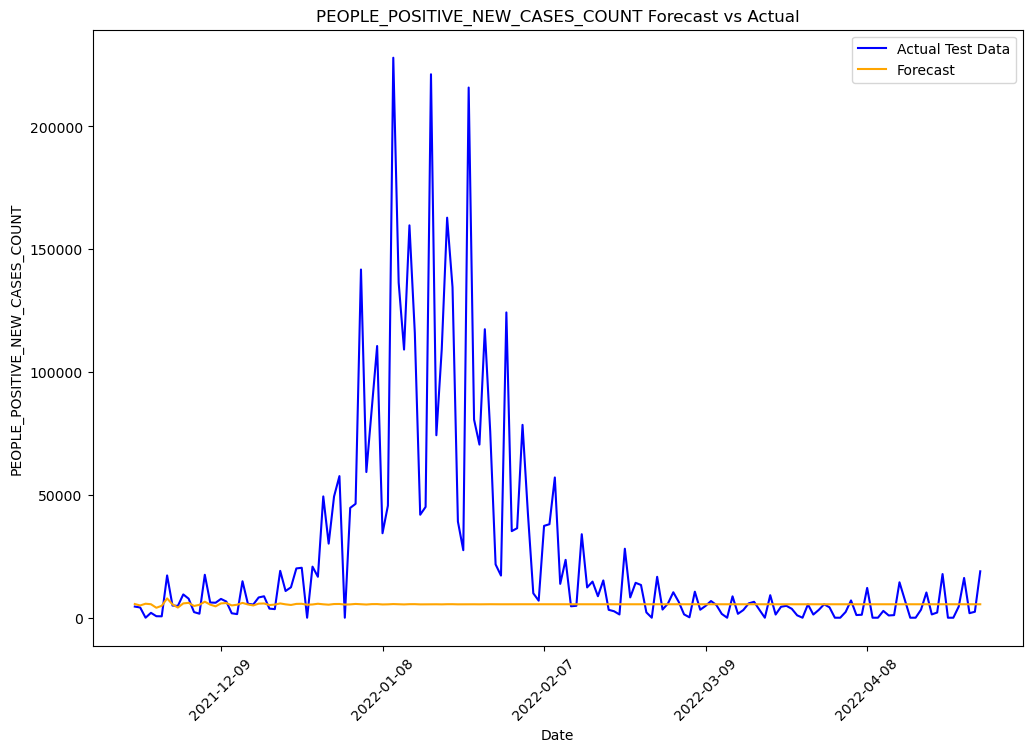

In [16]:
start_point = len(train_data)

end_point = start_point + len(test_data) - 1

model = ARIMA(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'], order=(9, 1, 6))
model_fit = model.fit()

predictions = model_fit.predict(start=start_point, end=end_point, typ='levels')

forecast_data = pd.Series(predictions, index=test_data.index)

plt.figure(figsize=(12, 8))

plt.plot(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], label='Actual Test Data', color='blue')

plt.plot(forecast_data, label='Forecast', color='orange')

plt.title('PEOPLE_POSITIVE_NEW_CASES_COUNT Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.legend()

ax = plt.gca()  
ax.xaxis.set_major_locator(MaxNLocator(6))

plt.xticks(rotation=45)

plt.show()

In [17]:
model_rmse = mean_squared_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data, squared=False)
model_mae = mean_absolute_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data)
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

actuals = test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test RMSE:  48884.90329832811
Test MAE:  23726.430564976552
Test MASE: 1.2049393765714769


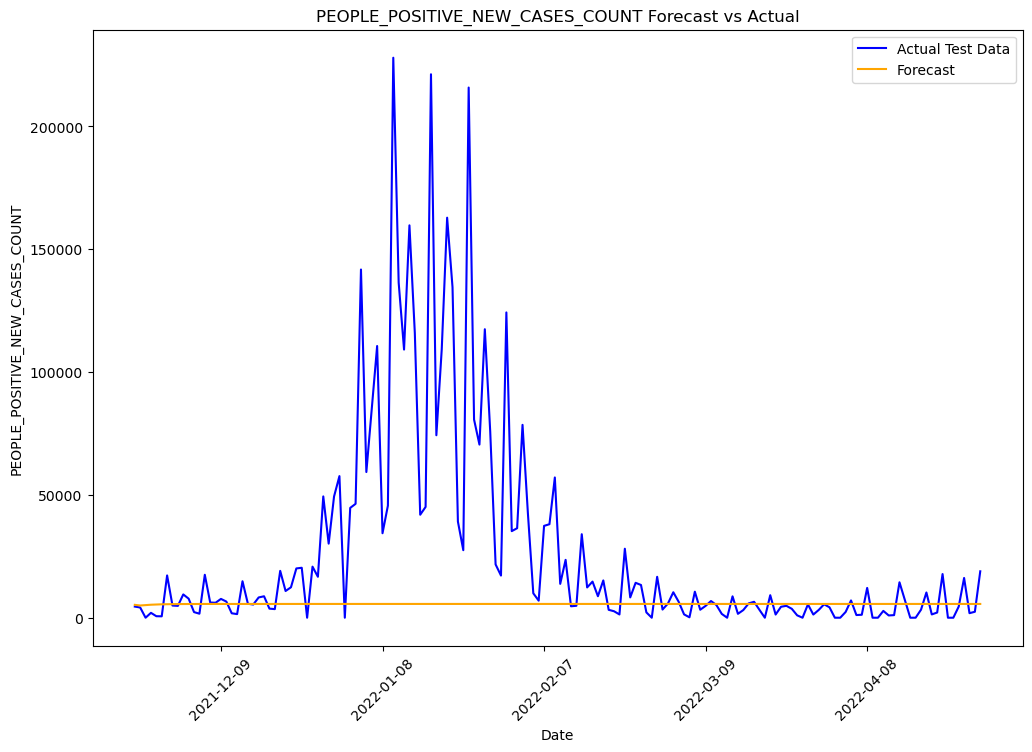

In [18]:
start_point = len(train_data)

end_point = start_point + len(test_data) - 1

model = ARIMA(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'], order=(2, 1, 2))
model_fit = model.fit()

predictions = model_fit.predict(start=start_point, end=end_point, typ='levels')

forecast_data = pd.Series(predictions, index=test_data.index)

plt.figure(figsize=(12, 8))

plt.plot(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], label='Actual Test Data', color='blue')

plt.plot(forecast_data, label='Forecast', color='orange')

plt.title('PEOPLE_POSITIVE_NEW_CASES_COUNT Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.legend()

ax = plt.gca()  
ax.xaxis.set_major_locator(MaxNLocator(6))

plt.xticks(rotation=45)

plt.show()

In [19]:
model_rmse = mean_squared_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data, squared=False)
model_mae = mean_absolute_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data)
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

actuals = test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test RMSE:  48843.18810567428
Test MAE:  23757.42473097124
Test MASE: 1.2065134056252242


## Seasonal ARIMA

### Base model

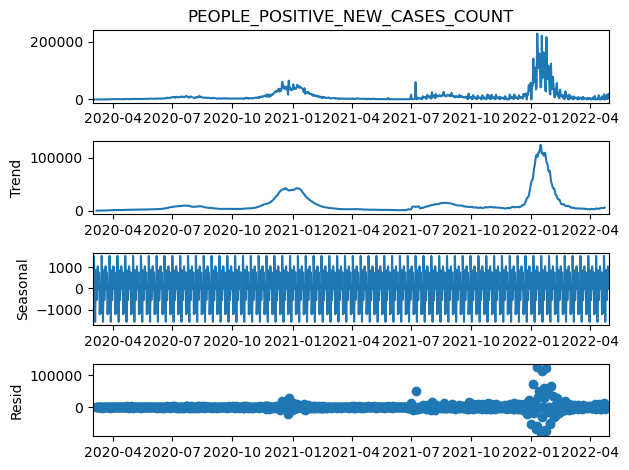

In [20]:
seasonal_decompose(df1['PEOPLE_POSITIVE_NEW_CASES_COUNT'], period=12).plot();

/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


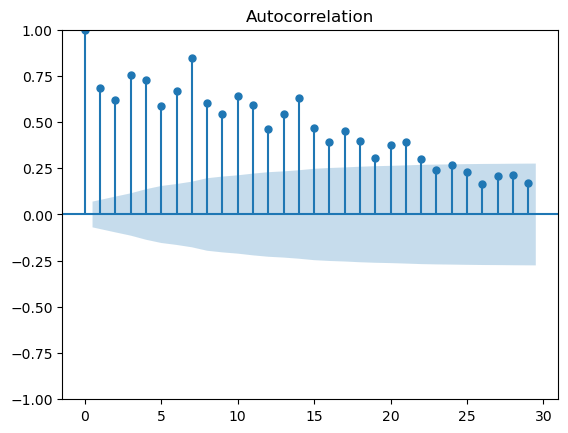

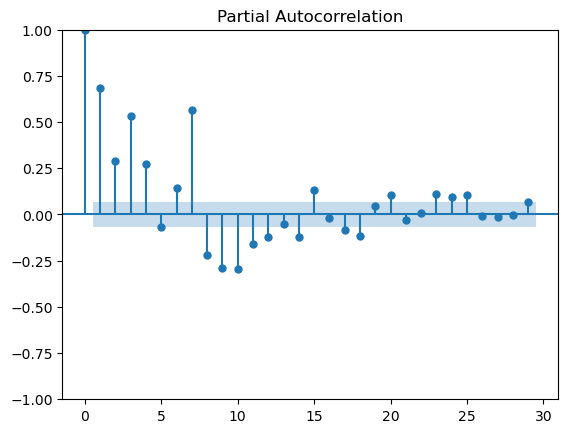

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1['PEOPLE_POSITIVE_NEW_CASES_COUNT'])
plot_pacf(df1['PEOPLE_POSITIVE_NEW_CASES_COUNT'])
plt.show()

In [23]:
model=sm.tsa.statespace.SARIMAX(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(1, 1, 1),seasonal_order=(1,1,1,7))
results=model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.75665D+00    |proj g|=  6.54836D-02

At iterate    5    f=  9.69748D+00    |proj g|=  2.06333D-02

At iterate   10    f=  9.69408D+00    |proj g|=  3.10696D-04

At iterate   15    f=  9.69408D+00    |proj g|=  5.17572D-04

At iterate   20    f=  9.69381D+00    |proj g|=  6.83988D-03

At iterate   25    f=  9.67560D+00    |proj g|=  3.56328D-02

At iterate   30    f=  9.64369D+00    |proj g|=  1.44894D-03

At iterate   35    f=  9.64196D+00    |proj g|=  2.13905D-02

At iterate   40    f=  9.64072D+00    |proj g|=  1.88665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

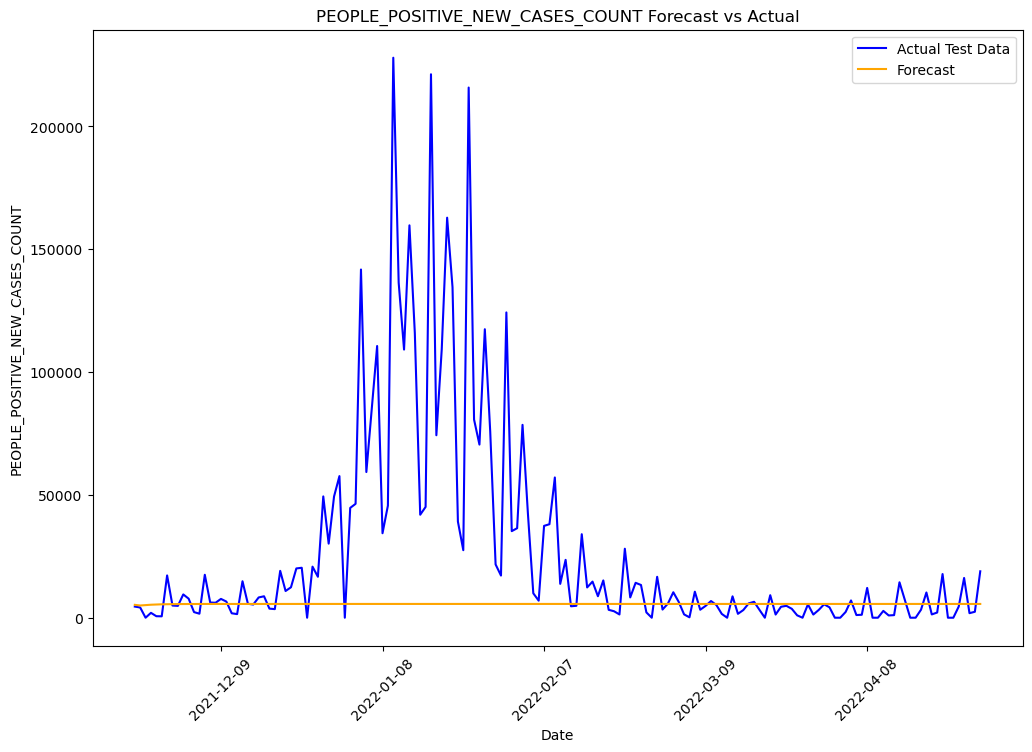

In [24]:
predictions = model_fit.predict(start=start_point, end=end_point, dynamic=True)

forecast_data = pd.Series(predictions, index=test_data.index)

plt.figure(figsize=(12, 8))

plt.plot(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], label='Actual Test Data', color='blue')

plt.plot(forecast_data, label='Forecast', color='orange')

plt.title('PEOPLE_POSITIVE_NEW_CASES_COUNT Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.legend()

ax = plt.gca()  
ax.xaxis.set_major_locator(MaxNLocator(6))

plt.xticks(rotation=45)

plt.show()

In [25]:
model_rmse = mean_squared_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data, squared=False)
model_mae = mean_absolute_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data)
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

actuals = test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test']
naive_forecasts = actuals.shift(1)
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test RMSE:  48843.18810567428
Test MAE:  23757.42473097124
Test MASE: 1.2065134056252242


### Tuning

In [26]:
p_range = q_range = range(0, 3)
P_range = Q_range = range(0, 3)
s_range = [7]

best_aic, best_bic = float("inf"), float("inf")
best_cfg_aic, best_cfg_bic = None, None

for train_index, test_index in tscv.split(train_data):
    train = train_data.iloc[train_index]
    
    for p in p_range:
        for q in q_range:
            for P in P_range:
                for Q in Q_range:
                    for s in s_range:
                        try:
                            model = sm.tsa.statespace.SARIMAX(train, order=(p, 1, q), seasonal_order=(P, 1, Q, s))
                            model_fit = model.fit(disp=False)
                            aic = model_fit.aic
                            bic = model_fit.bic
                            
                            if aic < best_aic:
                                best_aic, best_cfg_aic = aic, ((p, 1, q), (P, 1, Q, s))
                            
                            if bic < best_bic:
                                best_bic, best_cfg_bic = bic, ((p, 1, q), (P, 1, Q, s))
                            
                            print(f'SARIMA{((p, 1, q), (P, 1, Q, s))} AIC={aic:.3f}, BIC={bic:.3f}')
                        except Exception as e:
                            print(f"Error with SARIMA{((p, 1, q), (P, 1, Q, s))}: {e}")

print(f'Best AIC: SARIMA{best_cfg_aic} AIC={best_aic:.3f}')
print(f'Best BIC: SARIMA{best_cfg_bic} BIC={best_bic:.3f}')

SARIMA((0, 1, 0), (0, 1, 0, 7)) AIC=2517.319, BIC=2520.329
SARIMA((0, 1, 0), (0, 1, 1, 7)) AIC=2464.055, BIC=2470.076
SARIMA((0, 1, 0), (0, 1, 2, 7)) AIC=2464.319, BIC=2473.351
SARIMA((0, 1, 0), (1, 1, 0, 7)) AIC=2489.872, BIC=2495.893
SARIMA((0, 1, 0), (1, 1, 1, 7)) AIC=2464.297, BIC=2473.329
SARIMA((0, 1, 0), (1, 1, 2, 7)) AIC=2453.227, BIC=2465.269
SARIMA((0, 1, 0), (2, 1, 0, 7)) AIC=2462.731, BIC=2471.763
SARIMA((0, 1, 0), (2, 1, 1, 7)) AIC=2457.819, BIC=2469.862
SARIMA((0, 1, 0), (2, 1, 2, 7)) AIC=2453.414, BIC=2468.467
SARIMA((0, 1, 1), (0, 1, 0, 7)) AIC=2479.718, BIC=2485.739
SARIMA((0, 1, 1), (0, 1, 1, 7)) AIC=2440.707, BIC=2449.739
SARIMA((0, 1, 1), (0, 1, 2, 7)) AIC=2436.812, BIC=2448.854
SARIMA((0, 1, 1), (1, 1, 0, 7)) AIC=2462.978, BIC=2472.010
SARIMA((0, 1, 1), (1, 1, 1, 7)) AIC=2439.549, BIC=2451.591
SARIMA((0, 1, 1), (1, 1, 2, 7)) AIC=2427.342, BIC=2442.395
SARIMA((0, 1, 1), (2, 1, 0, 7)) AIC=2433.548, BIC=2445.590
SARIMA((0, 1, 1), (2, 1, 1, 7)) AIC=2429.255, BIC=2444.3

SARIMA((2, 1, 0), (1, 1, 1, 7)) AIC=5943.349, BIC=5961.999
SARIMA((2, 1, 0), (1, 1, 2, 7)) AIC=5928.583, BIC=5950.964
SARIMA((2, 1, 0), (2, 1, 0, 7)) AIC=5986.149, BIC=6004.800
SARIMA((2, 1, 0), (2, 1, 1, 7)) AIC=5919.391, BIC=5941.772
SARIMA((2, 1, 0), (2, 1, 2, 7)) AIC=5922.008, BIC=5948.119
SARIMA((2, 1, 1), (0, 1, 0, 7)) AIC=6037.288, BIC=6052.208
SARIMA((2, 1, 1), (0, 1, 1, 7)) AIC=5939.044, BIC=5957.694
SARIMA((2, 1, 1), (0, 1, 2, 7)) AIC=5916.682, BIC=5939.062
SARIMA((2, 1, 1), (1, 1, 0, 7)) AIC=6030.017, BIC=6048.668
SARIMA((2, 1, 1), (1, 1, 1, 7)) AIC=5926.148, BIC=5948.528
SARIMA((2, 1, 1), (1, 1, 2, 7)) AIC=5913.909, BIC=5940.020
SARIMA((2, 1, 1), (2, 1, 0, 7)) AIC=5975.541, BIC=5997.921
SARIMA((2, 1, 1), (2, 1, 1, 7)) AIC=5907.731, BIC=5933.842
SARIMA((2, 1, 1), (2, 1, 2, 7)) AIC=5912.754, BIC=5942.595
SARIMA((2, 1, 2), (0, 1, 0, 7)) AIC=6036.555, BIC=6055.205
SARIMA((2, 1, 2), (0, 1, 1, 7)) AIC=5934.360, BIC=5956.741
SARIMA((2, 1, 2), (0, 1, 2, 7)) AIC=5938.733, BIC=5964.8

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70371D+00    |proj g|=  1.90924D-02


 This problem is unconstrained.



At iterate    5    f=  9.69971D+00    |proj g|=  6.28725D-03

At iterate   10    f=  9.69798D+00    |proj g|=  3.14672D-04

At iterate   15    f=  9.69798D+00    |proj g|=  2.26867D-04

At iterate   20    f=  9.69744D+00    |proj g|=  9.01792D-03

At iterate   25    f=  9.68043D+00    |proj g|=  1.38670D-02

At iterate   30    f=  9.66738D+00    |proj g|=  1.03973D-02

At iterate   35    f=  9.65171D+00    |proj g|=  1.89825D-02

At iterate   40    f=  9.64945D+00    |proj g|=  3.72620D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     53      1     0     0   1.139D-05   9.649D+00
  F =   9.64944501220

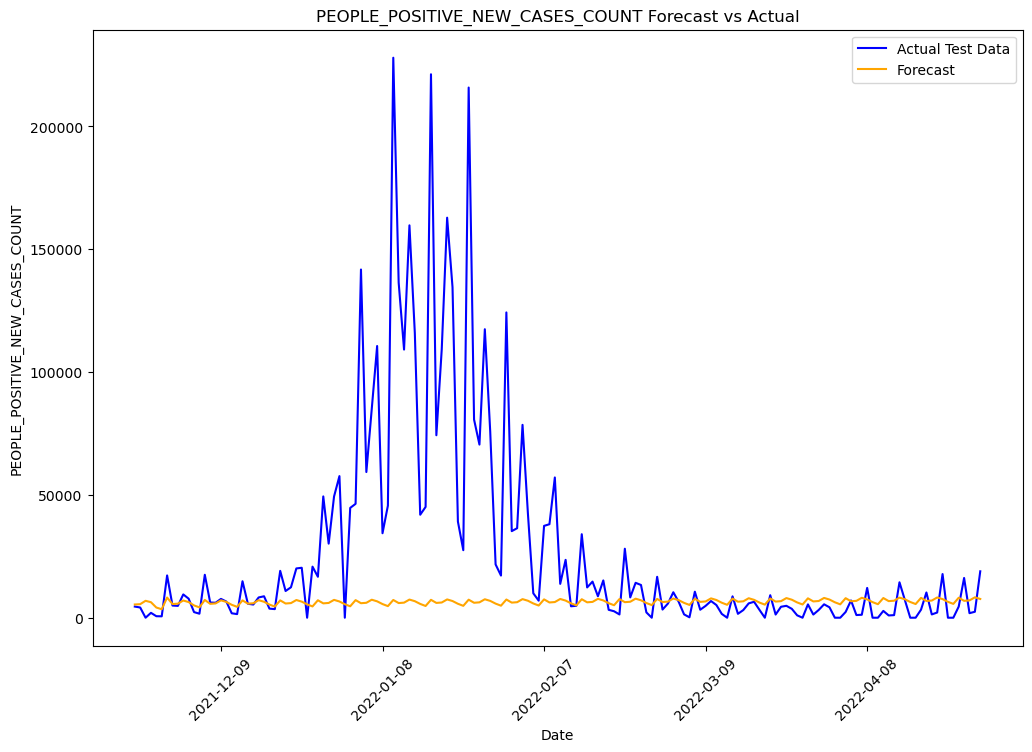

In [27]:
model=sm.tsa.statespace.SARIMAX(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'],order=(0, 1, 1),seasonal_order=(1,1,2,7))
model_fit=model.fit()

predictions = model_fit.predict(start=start_point, end=end_point, dynamic=True)

forecast_data = pd.Series(predictions, index=test_data.index)

plt.figure(figsize=(12, 8))

plt.plot(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], label='Actual Test Data', color='blue')

plt.plot(forecast_data, label='Forecast', color='orange')

plt.title('PEOPLE_POSITIVE_NEW_CASES_COUNT Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.legend()

ax = plt.gca()  
ax.xaxis.set_major_locator(MaxNLocator(6))  

plt.xticks(rotation=45)

plt.show()

In [28]:
model_rmse = mean_squared_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data, squared=False)
model_mae = mean_absolute_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast_data)
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

actuals = test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test']
naive_forecasts = actuals.shift(1)  # Shift the actuals by one to get the naive forecast
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

# Calculate MASE
mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test RMSE:  48363.668826770874
Test MAE:  23502.766834943395
Test MASE: 1.1935806837967775


## AUTO ARIMA

In [29]:
train_data = train_data.asfreq('D')

In [30]:
auto_model = auto_arima(train_data['PEOPLE_POSITIVE_NEW_CASES_COUNT'], seasonal=True, m=7, suppress_warnings=True, stepwise=True)

print(auto_model.summary())
n_periods=158
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

print("Forecast:", forecast)
print("Confidence Interval:", conf_int)

/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/asherbank/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  632
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 7)   Log Likelihood               -6153.146
Date:                           Tue, 12 Mar 2024   AIC                          12322.292
Time:                                   23:24:31   BIC                          12357.870
Sample:                               03-01-2020   HQIC                         12336.110
                                    - 11-22-2021                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2892      2.801      0.103      0.918      -5.201       5.779
ar.L1          0.6371      0.180      3.544

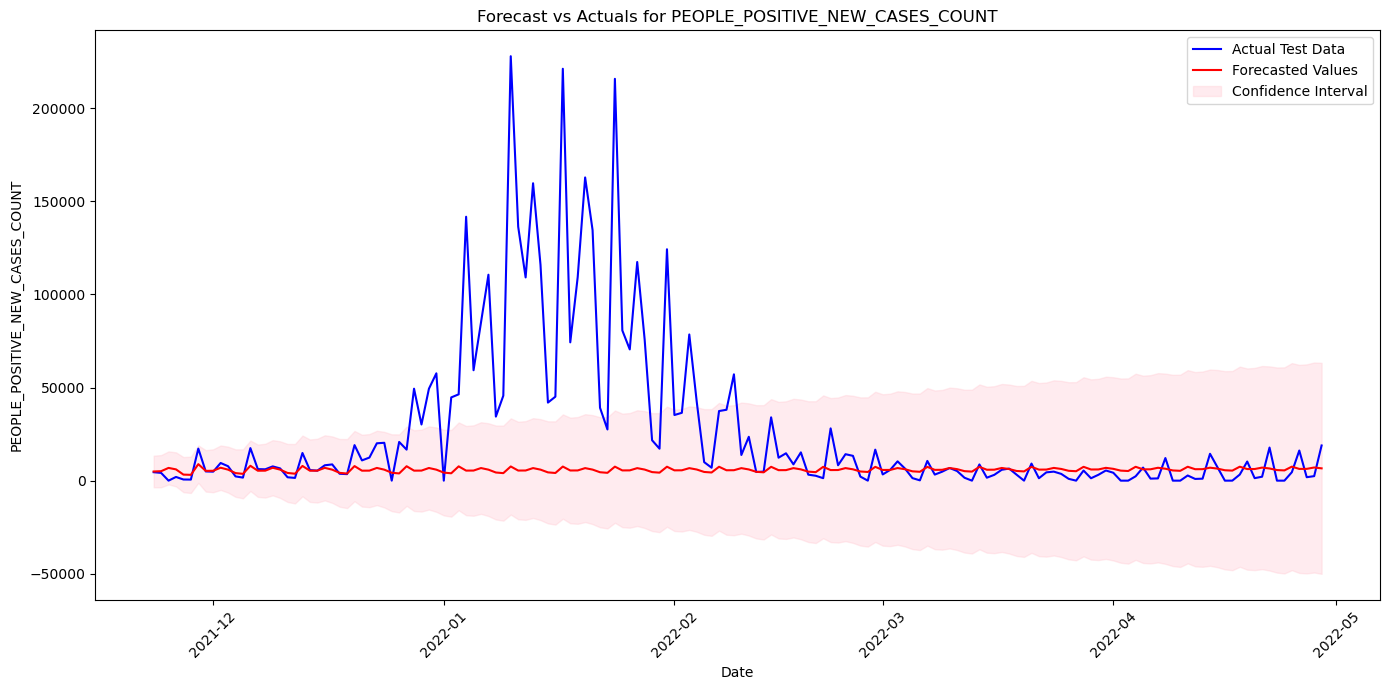

In [31]:
start_date = test_data.index[0] if test_data.index.tz is None else test_data.index[0].tz_localize(None)

# Create forecast_index
forecast_index = pd.date_range(start=start_date, periods=n_periods, freq='D')

# Plot the actual values
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], label='Actual Test Data', color='blue')

# Plot the forecasted values
plt.plot(forecast_index, forecast, label='Forecasted Values', color='red')

# Plot the confidence intervals
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Forecast vs Actuals for PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.xlabel('Date')
plt.ylabel('PEOPLE_POSITIVE_NEW_CASES_COUNT')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

In [32]:
model_rmse = mean_squared_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast, squared=False)
model_mae = mean_absolute_error(test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test'], forecast)
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)

actuals = test_data['PEOPLE_POSITIVE_NEW_CASES_COUNT_test']
naive_forecasts = actuals.shift(1)
mae_naive = mean_absolute_error(actuals[1:], naive_forecasts[1:])

mase = model_mae / mae_naive

print(f'Test MASE: {mase}')

Test RMSE:  48547.84546475668
Test MAE:  23472.265900956783
Test MASE: 1.1920317033767338
